# Chapter 2: Quality Control

In this chapter we will investigate the most usefull QC operations that will allow you to quickly investigate your data


we start by loading the example data and the already annotated metadata. we also perform some filtering to pre-process these data. These filtering operations will be shown in more detail in Chapter 4

In [1]:
from fluid_experiment.fluid_experiment import FluidExperiment

PATH = "../../data/midap-tools_example"
experiment = FluidExperiment(PATH, name= "example_experiment")
experiment.load_metadata_template()
experiment.filter_data("frame", max_value=20)
experiment.filter_data("trackID", min_occurences=5)
print(experiment)


Loading sample at position pos1 for color channel YFP
Loading sample at position pos1 for color channel CFP
Loading sample at position pos2 for color channel YFP
Loading sample at position pos2 for color channel CFP
Loading sample at position pos3 for color channel YFP
Loading sample at position pos3 for color channel CFP
Loading sample at position pos4 for color channel YFP
Loading sample at position pos4 for color channel CFP
Loading sample at position pos5 for color channel YFP
Loading sample at position pos5 for color channel CFP
Loading sample at position pos6 for color channel YFP
Loading sample at position pos6 for color channel CFP
Successfully loaded data with consistent number of frames: 143
Filtering out frame with less than 0 occurences
Filtering out frame with min value None and max value 20
Filtering channel YFP at position pos1:
Filtering channel CFP at position pos1:
Filtering channel YFP at position pos2:
Filtering channel CFP at position pos2:
Filtering channel YFP at

## Random sample QC plot

The following example will pick a random number of entities (i.e trackIDs) and plot a certain value across time. Mostly, this will be used to show length or area of tracked cells over time.

We have to define:
1.  what is our y axis? Here we take the `major_axis_length`
2.  how many samples do we plot? here we set this to 16
3.  what is our identifer column? here we use `trackID`


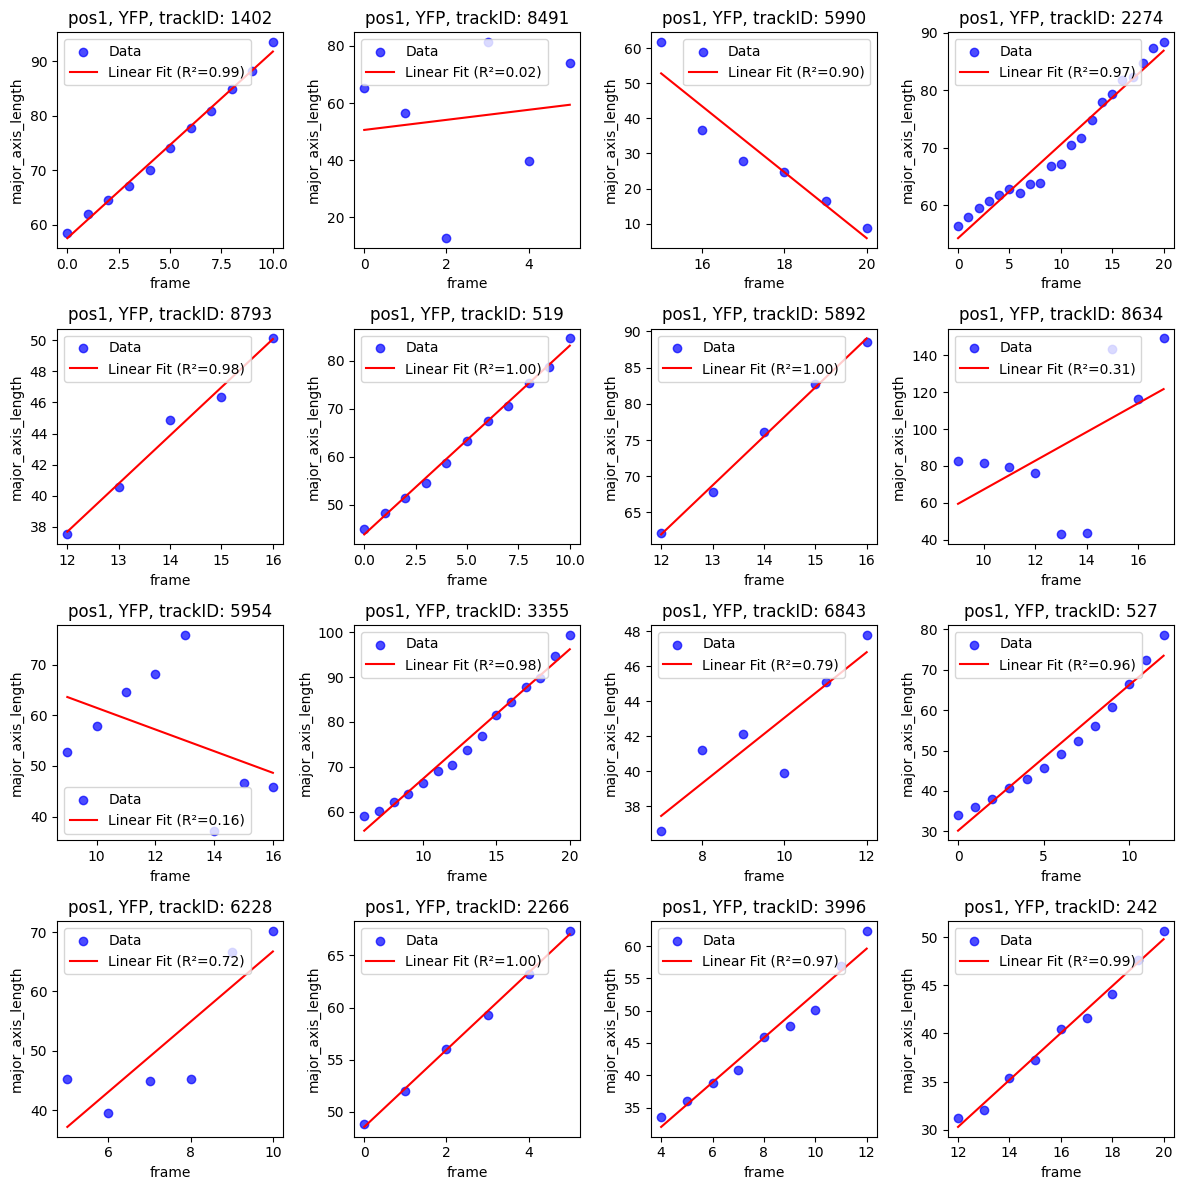

In [2]:
experiment.plot_qc(value_column = "major_axis_length", n_samples=16, id_column = "trackID", positions= "pos1", color_channels="YFP")

We can now see how well the major axis length changes over time for the selected number of random samples. This gives us indication about the performance of the experiment (i.e growth conditions), segmentation and tracking

**Tip:** in this example we only print a selected single position and color channel. 
If we do not specify position and color channel, it will produce one plot for each pair! (`experiment.plot_qc(value_column = "major_axis_length", n_samples=16, id_column = "trackID"`)
Most QC functions that you see further down in this document with a specified position or color channel work the same. simply omitting the selection will lead to the generation of multiple plots

## Histogram QC Plots

Next, we investigate how we can create histogram plots of our data. This alows us to quickly inspect the distribution of our data.

to create histogram plots, we have to specify:
- what data columns we want to show on the plot. In this example, we plot: 
    - `area`, 
    - `major_axis_length`
    - `intensity_mean`
    -  `y`

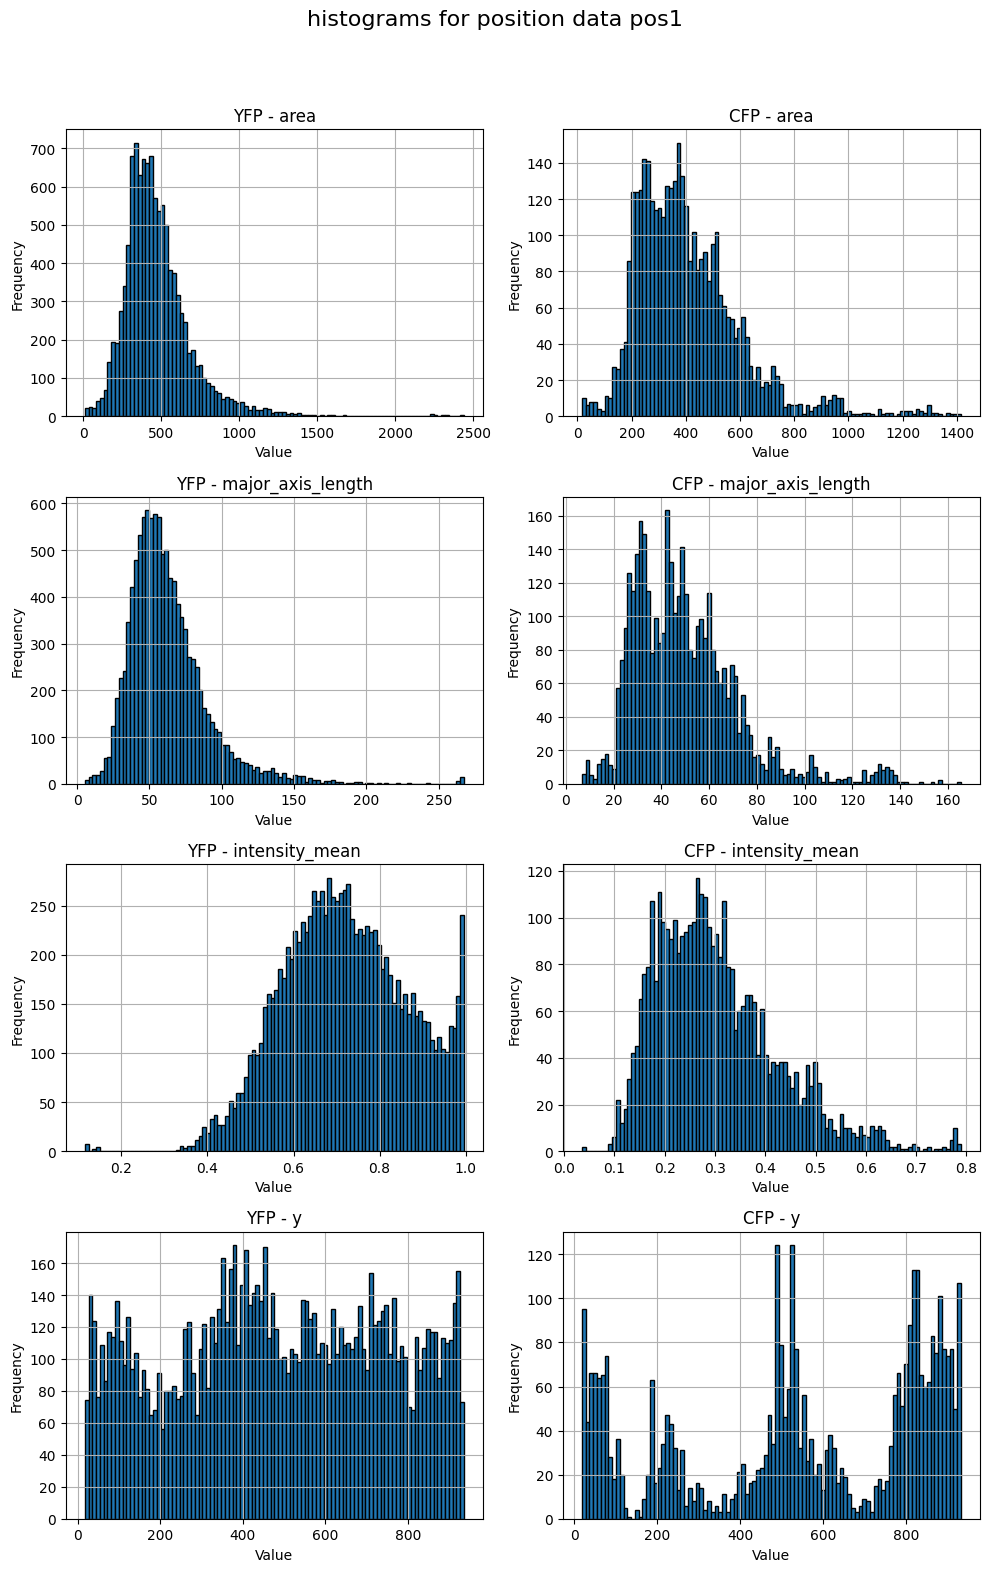

In [3]:
experiment.plot_qc_histograms(columns=["area","major_axis_length","intensity_mean","y"], positions= "pos1")

***

This operation, we can also apply on a group level. lets quickly compare the two groups on the mean intensity.
If we do this on a group level, data is first aggregated for the entire group, and then plotted

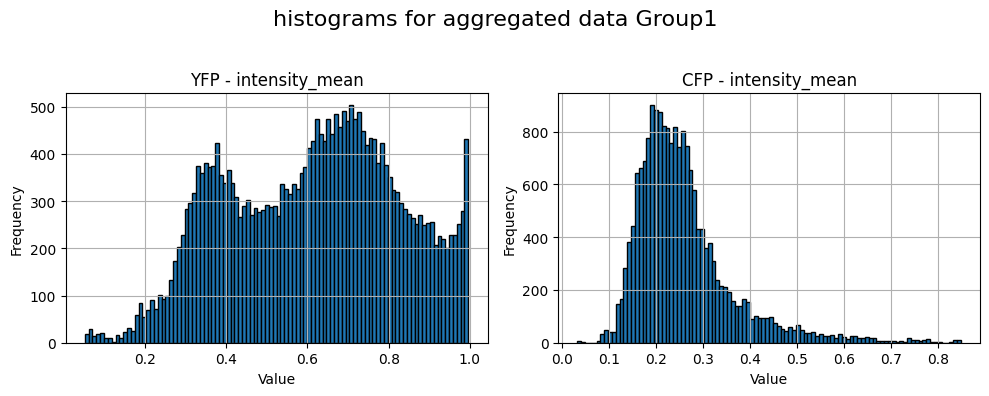

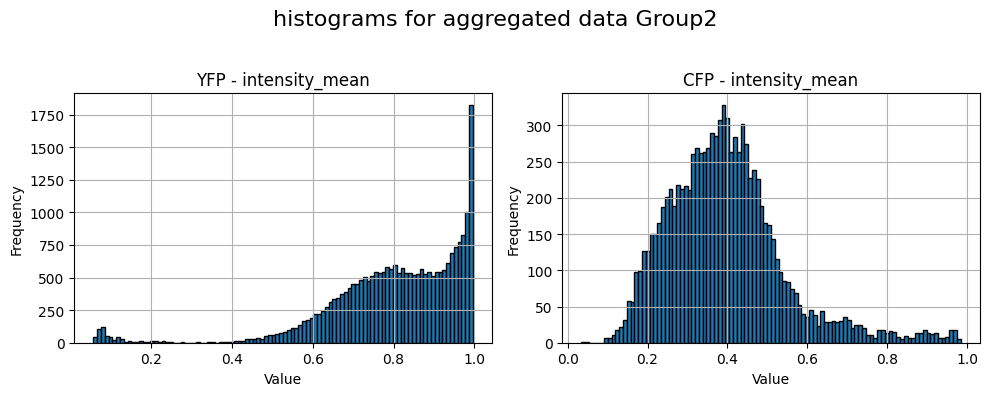

In [4]:
experiment.plot_qc_histograms(columns="intensity_mean",group_by="group")

## Life cylce histogram

the next histogram will create a histogram of the life cycles of all trackIDs. This way we can quickly see how long individual cells exist

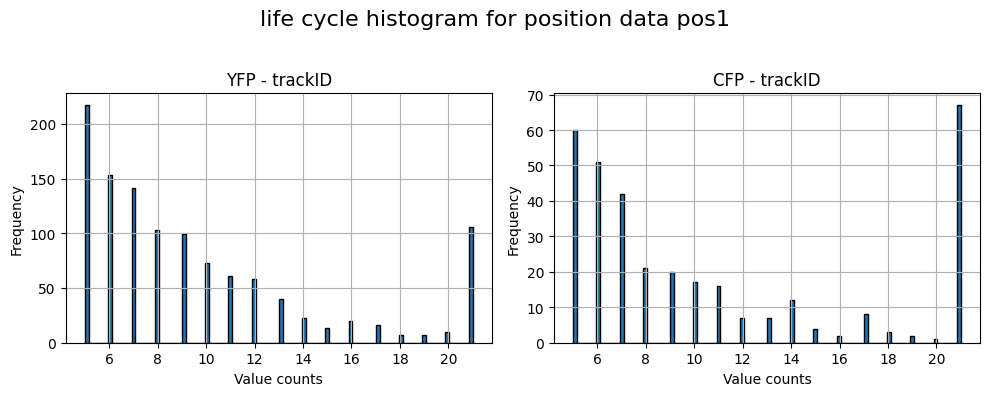

In [5]:
experiment.plot_life_cycle_histograms(columns = "trackID", positions = "pos1")

## X-Y correlations

a further method we can use is x-y correlations of two data columns

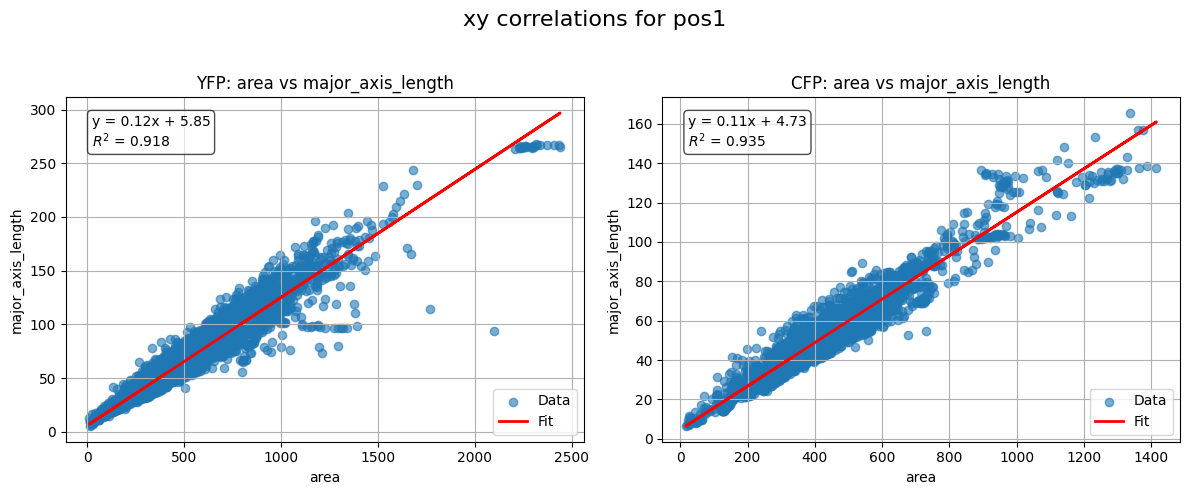

In [6]:
experiment.plot_xy_correlation(x_column= "area",y_column="major_axis_length",positions= "pos1")

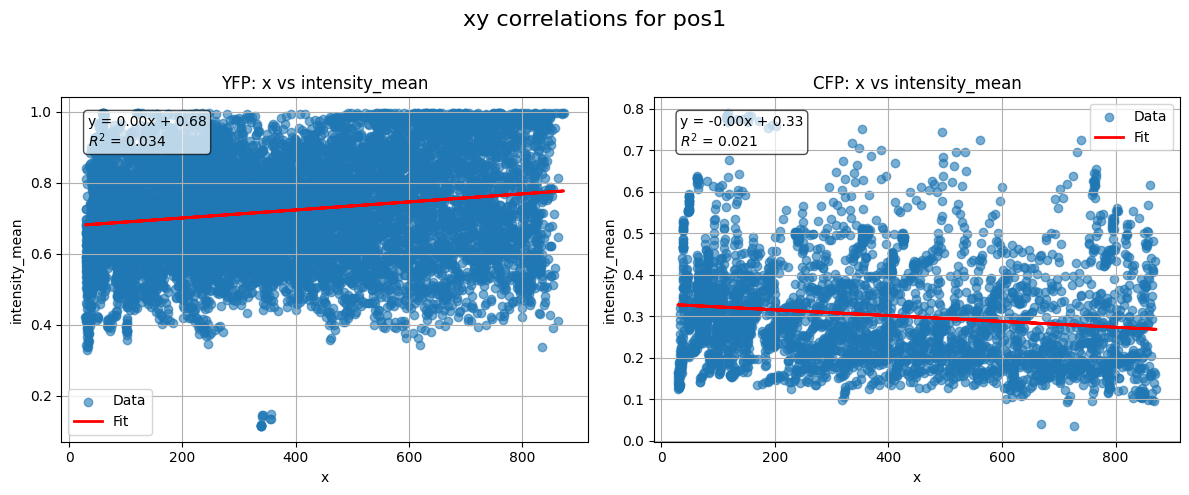

In [7]:
experiment.plot_xy_correlation(x_column= "x",y_column="intensity_mean",positions= "pos1")

## Print selected frame

We can print segmentaiton results for a single frame in one or more positions


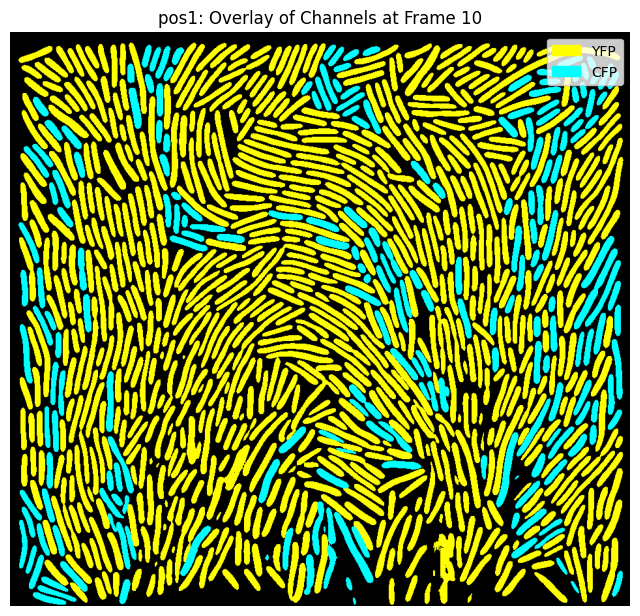

In [8]:
experiment.plot_selected_frame(frame = 10, positions = "pos1")

***

**Note:** The segmentation data is very large (see for example /data/midap-tools_example/pos1/CFP/track_output/segmentations_strack.h5, which is a 500MB file for the segmentation output of just this one color channel at position 1)!. Therefore it is only loaded interactively when this function is called.

To be as performant as possible, the save files midap-tools generate do not include this data, but only the path to this data. Therefore, if you move or copy the midap output folder to a new location it may not find this data anymore.

If the plot data does not work anymore, ensure the correct path is set (see Chapter 3)

**Tip:** colors can be set manually as a list of RGB tuples (one per color_channel). See the next example

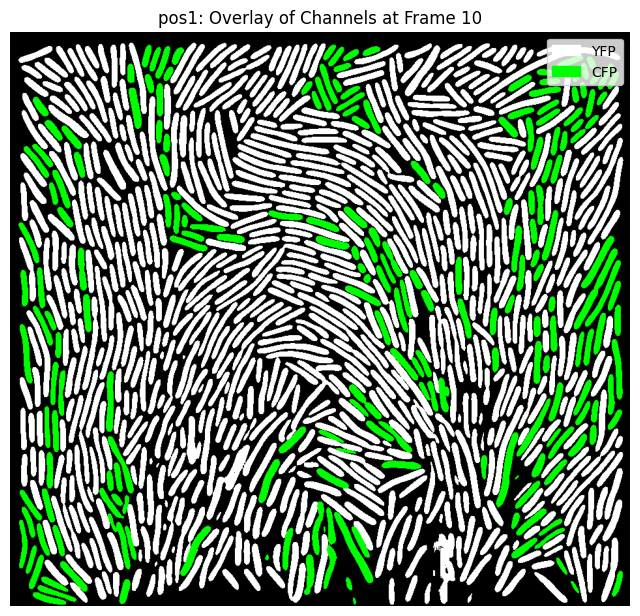

In [9]:
experiment.plot_selected_frame(frame = 10, positions = "pos1", color=[(255,255,255),(0,255,0)])

## Print spatial maps

spatial maps can help you to inspect local data effects. They will print for a selected frame one or more positions and color the cells by the magnitude of this datapoint

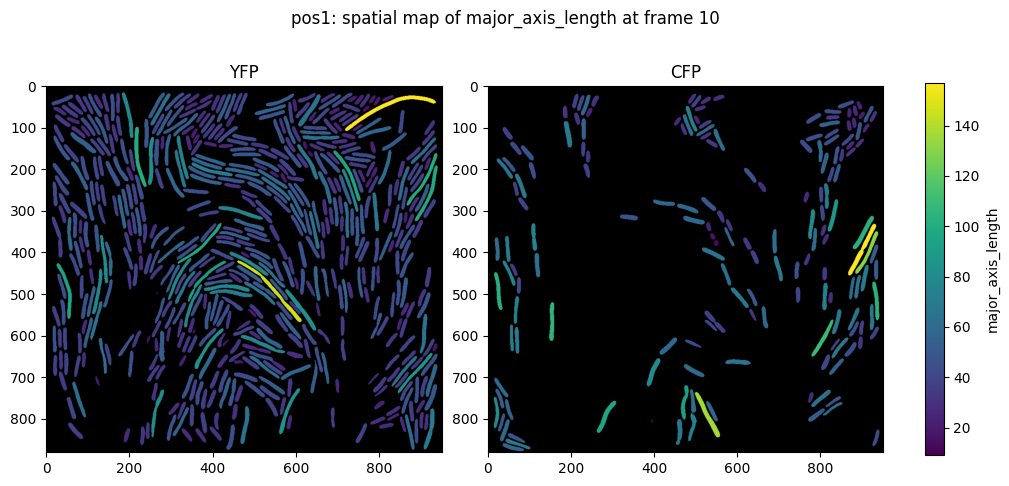

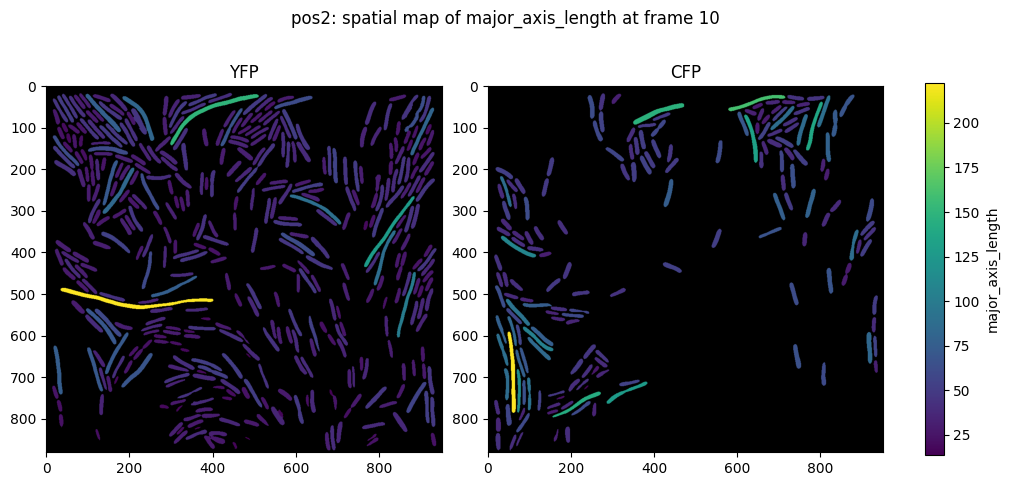

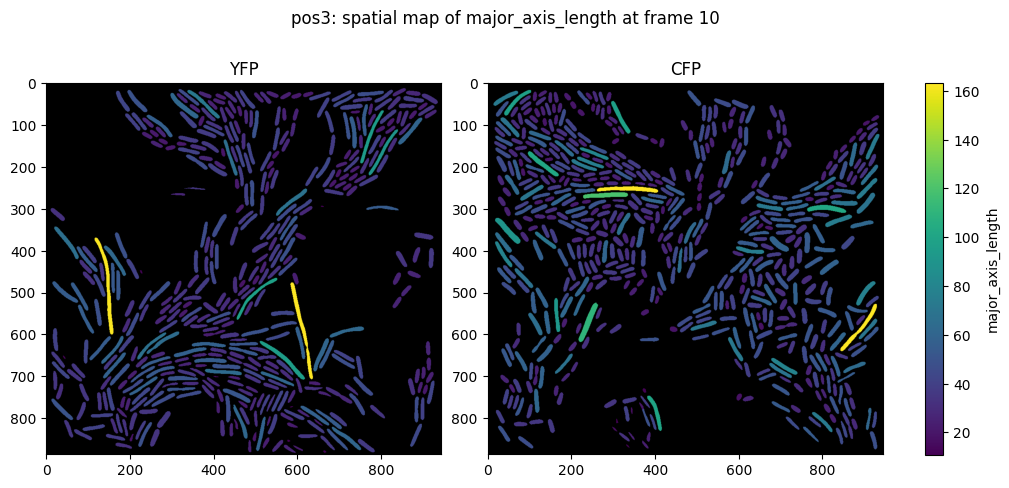

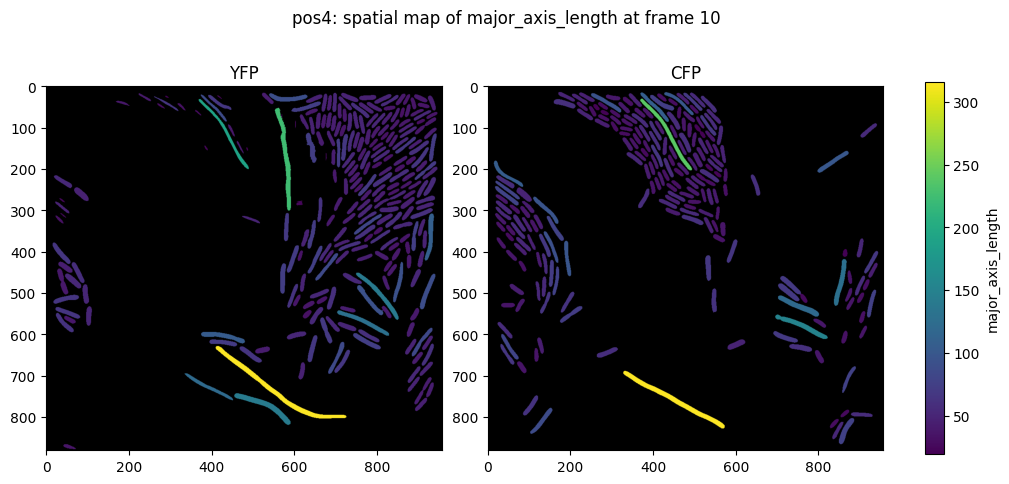

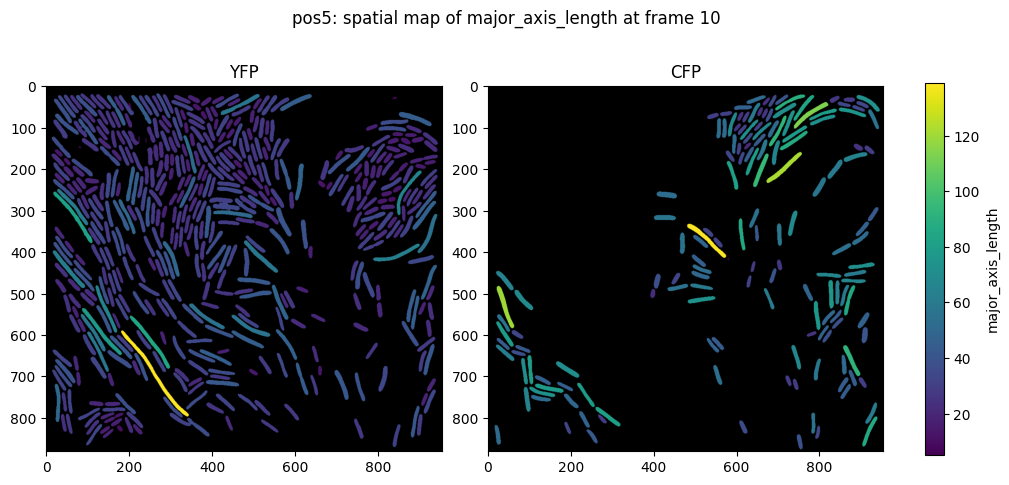

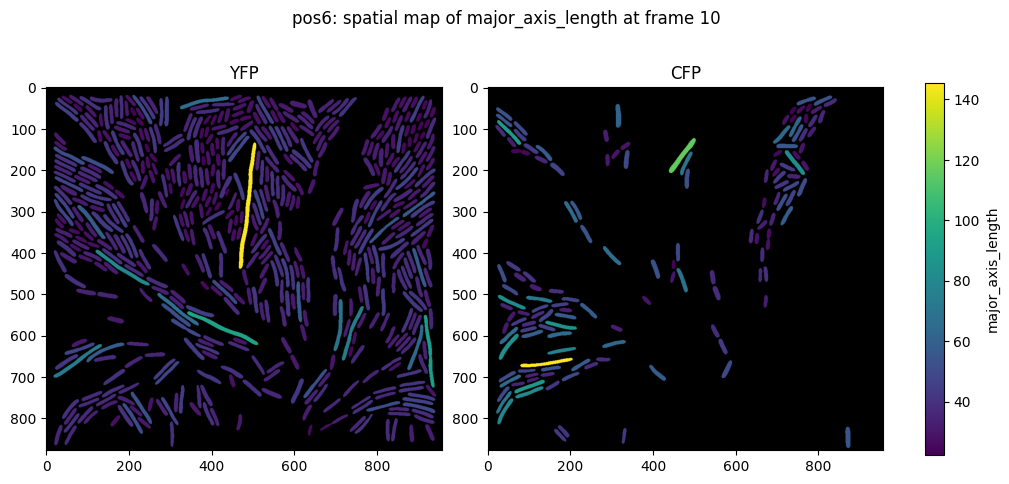

In [10]:
experiment.plot_spatial_maps(frame = 10,property_column="major_axis_length")